In [7]:
import re
import string
import codecs
import numpy as np

f = codecs.open("socialmedia-disaster-tweets-DFE-cleaned2.csv", "r", encoding = 'utf-8', errors = 'ignore') 
raw_data = f.readlines()

In [8]:
labels = []
tweets = []
for line in raw_data:
    line_split = line.split(",", 1)
    [l_labels, l_tweets] = line_split
    labels.append(int(l_labels))
    tweets.append(l_tweets)
    
labels = np.array(labels)

In [9]:
# (1) remove punctuation, (2),(3) remove whitespace and (4) lowercase all words
def makeWordList(corpus_text):
    
    for c in string.punctuation:
        corpus_text = corpus_text.replace(c, "")  # -- (1)

    text = re.sub(r'\S*\d\S*', '', corpus_text) # -- (2)
    text = re.sub(r'[^\w\s]', '', text)         # -- (3)
    text = text.lower().split()           # -- (4)         

    li = []
    for token in text:
        li.append(token)
    
    return " ".join(li)

In [10]:
cleaned_tweet_list = []
for tweet in tweets:
    clean_tweet_text = makeWordList(tweet)
    cleaned_tweet_list.append(clean_tweet_text)

In [11]:
cleaned_tweet_list

['just happened a terrible car crash',
 'our deeds are the reason of this earthquake may allah forgive us all',
 'heard about earthquake is different cities stay safe everyone',
 'there is a forest fire at spot pond geese are fleeing across the street i cannot save them all',
 'forest fire near la ronge sask canada',
 'all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected',
 'people receive wildfires evacuation orders in california',
 'just got sent this photo from ruby alaska as smoke from wildfires pours into a school',
 'rockyfire update california hwy closed in both directions due to lake county fire cafire wildfires',
 'apocalypse lighting spokane wildfires',
 'flood disaster heavy rain causes flash flooding of streets in manitou colorado springs areas',
 'typhoon soudelor kills in china and taiwan',
 'were shakingits an earthquake',
 'im on top of the hill and i can see a fire in the woods',
 'theres an 

In [12]:
f.close()

In [13]:
cleaned_tweet_list

['just happened a terrible car crash',
 'our deeds are the reason of this earthquake may allah forgive us all',
 'heard about earthquake is different cities stay safe everyone',
 'there is a forest fire at spot pond geese are fleeing across the street i cannot save them all',
 'forest fire near la ronge sask canada',
 'all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected',
 'people receive wildfires evacuation orders in california',
 'just got sent this photo from ruby alaska as smoke from wildfires pours into a school',
 'rockyfire update california hwy closed in both directions due to lake county fire cafire wildfires',
 'apocalypse lighting spokane wildfires',
 'flood disaster heavy rain causes flash flooding of streets in manitou colorado springs areas',
 'typhoon soudelor kills in china and taiwan',
 'were shakingits an earthquake',
 'im on top of the hill and i can see a fire in the woods',
 'theres an 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(max_df=0.95,
                                min_df=2,
                                max_features=10000,
                                stop_words='english')

tweet_tfidf = count.fit_transform(cleaned_tweet_list)

tweet_tfidf.shape

(10876, 7589)

In [15]:
count.vocabulary_

{'just': 3571,
 'happened': 2938,
 'terrible': 6648,
 'car': 979,
 'crash': 1490,
 'deeds': 1663,
 'reason': 5406,
 'earthquake': 2011,
 'allah': 168,
 'forgive': 2554,
 'heard': 3005,
 'different': 1803,
 'cities': 1180,
 'stay': 6343,
 'safe': 5749,
 'forest': 2549,
 'spot': 6285,
 'pond': 5061,
 'fleeing': 2491,
 'street': 6401,
 'save': 5802,
 'near': 4450,
 'la': 3685,
 'canada': 946,
 'residents': 5544,
 'asked': 352,
 'shelter': 5982,
 'place': 4985,
 'officers': 4631,
 'evacuation': 2206,
 'orders': 4709,
 'expected': 2251,
 'people': 4878,
 'receive': 5413,
 'wildfires': 7378,
 'california': 922,
 'got': 2789,
 'sent': 5912,
 'photo': 4929,
 'ruby': 5711,
 'alaska': 151,
 'smoke': 6152,
 'school': 5826,
 'rockyfire': 5663,
 'update': 7064,
 'hwy': 3223,
 'closed': 1224,
 'lake': 3696,
 'county': 1457,
 'cafire': 909,
 'apocalypse': 265,
 'lighting': 3833,
 'spokane': 6275,
 'flood': 2501,
 'disaster': 1826,
 'heavy': 3019,
 'rain': 5327,
 'causes': 1035,
 'flash': 2486,
 'floo

In [16]:
tweet_array = tweet_tfidf.toarray()

In [17]:
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

pca = PCA(n_components=2)
tweet_pca = pca.fit_transform(tweet_array)

(-0.9279193270908256,
 2.3763116597194918,
 -1.7588093888565393,
 2.6543716767730436)

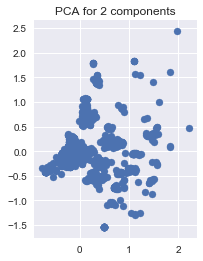

In [18]:
plt.scatter(tweet_pca[:, 0], tweet_pca[:, 1])
plt.title("PCA for 2 components")
plt.axis('scaled')

In [19]:
pca.explained_variance_ratio_

array([0.00725942, 0.00659986])

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, perplexity=30, learning_rate=1000, init='random', random_state=0)
twitter_tsne = tsne.fit_transform(tweet_pca)

(-28.183006665812027,
 33.75956382523586,
 -28.740519926212915,
 32.70951597418655)

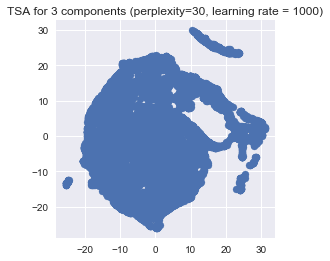

In [21]:
plt.scatter(twitter_tsne[:, 0], twitter_tsne[:, 1])
plt.title("TSA for 3 components (perplexity=30, learning rate = 1000)")
plt.axis('scaled')

In [30]:
num_topics =16
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=num_topics, learning_method='online', random_state=0)
lda.fit_transform(tweet_array)

array([[0.01041667, 0.01041667, 0.66716098, ..., 0.01041667, 0.01041667,
        0.01041667],
       [0.01041667, 0.01041667, 0.01041667, ..., 0.01041667, 0.67708333,
        0.01041667],
       [0.00892857, 0.00892857, 0.00892857, ..., 0.00892857, 0.00892857,
        0.00892857],
       ...,
       [0.00694444, 0.00694444, 0.00694444, ..., 0.11805556, 0.00694444,
        0.00694444],
       [0.15178571, 0.58035714, 0.15178571, ..., 0.00892857, 0.00892857,
        0.00892857],
       [0.00892857, 0.00892857, 0.15178572, ..., 0.37086929, 0.36127356,
        0.00892857]])

In [31]:
lda.components_.shape

(16, 7589)

In [32]:
topic_word_distributions = np.array([topic_word_pseudocounts / np.sum(topic_word_pseudocounts)
                                     for topic_word_pseudocounts in lda.components_])

In [33]:
num_top_words = 10

print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
print()

for topic_idx in range(num_topics):
    print('[Topic ', topic_idx, ']', sep='')
    sort_indices = np.argsort(topic_word_distributions[topic_idx])[::-1]
    for rank in range(num_top_words):
        word_idx = sort_indices[rank]
        print(count.get_feature_names()[word_idx], ':', topic_word_distributions[topic_idx, word_idx])
    print()

Displaying the top 10 words per topic and their probabilities within the topic...

[Topic 0]
world : 0.026699173108218153
bomb : 0.026057415357692845
man : 0.024322977812979464
body : 0.023439420552607202
burning : 0.023354567256496817
life : 0.022392265533869166
make : 0.021842712120013034
buildings : 0.019746669478895782
dont : 0.017359788266455106
work : 0.017040597341520584

[Topic 1]
people : 0.05368600686344982
today : 0.02511085342244686
hiroshima : 0.02448864405603005
rt : 0.0227308360498398
years : 0.020784156157040955
flood : 0.015360646183704571
survivors : 0.013597998689875213
trouble : 0.012972325650250886
atomic : 0.012870922526048942
tragedy : 0.012739914797297634

[Topic 2]
just : 0.0721176321742694
emergency : 0.033544599568981696
got : 0.025008082755423055
attack : 0.024884825802536245
im : 0.01277155758475305
ass : 0.012363979050747051
smoke : 0.012307443481514246
terrorist : 0.01226641581466605
shit : 0.011945535645855713
violent : 0.01187183926483297

[Topic 3]
wan

In [34]:
proportions = lda.transform(tweet_tfidf)

In [37]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, tweet_tfidf, count)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9      0.242711 -0.127176       1        1  7.814318
2      0.209562  0.055426       2        1  7.279689
0     -0.102034 -0.251157       3        1  6.855878
12     0.169519  0.052933       4        1  6.829843
8      0.028706  0.205270       5        1  6.641843
6     -0.010970  0.090259       6        1  6.337166
1     -0.082334  0.067825       7        1  6.130368
5      0.089835 -0.183338       8        1  6.098225
4     -0.043083  0.029411       9        1  5.979421
7     -0.069099  0.117024      10        1  5.961159
3     -0.073761  0.023435      11        1  5.928477
14    -0.018226 -0.024904      12        1  5.847753
11    -0.036155  0.003528      13        1  5.822112
13    -0.068082  0.022597      14        1  5.718800
15    -0.154109 -0.103401      15        1  5.586479
10    -0.082480  0.022269      16        1  5.168470, topic_info=     Category        Freq        Term       Total  loglift  logprob
3571  Default  406.000000        just  406.000000  30.0000  30.0000
208   Default  382.000000         amp  382.000000  29.0000  29.0000
4478  Default  305.000000         new  305.000000  28.0000  28.0000
3273  Default  388.000000          im  388.000000  27.0000  27.0000
3837  Default  444.000000        like  444.000000  26.0000  26.0000
4878  Default  255.000000      people  255.000000  25.0000  25.0000
4484  Default  259.000000        news  259.000000  24.0000  24.0000
1895  Default  257.000000        dont  257.000000  23.0000  23.0000
1826  Default  200.000000    disaster  200.000000  22.0000  22.0000
6463  Default  194.000000     suicide  194.000000  21.0000  21.0000
5052  Default  193.000000      police  193.000000  20.0000  20.0000
2095  Default  189.000000   emergency  189.000000  19.0000  19.0000
6384  Default  168.000000       storm  168.000000  18.0000  18.0000
7168  Default  211.000000       video  211.000000  17.0000  17.0000
922   Default  149.000000  california  149.000000  16.0000  16.0000
6763  Default  142.000000        time  142.000000  15.0000  15.0000
4570  Default  140.000000     nuclear  140.000000  14.0000  14.0000
1490  Default  146.000000       crash  146.000000  13.0000  13.0000
7454  Default  142.000000       world  142.000000  12.0000  12.0000
1628  Default  132.000000         day  132.000000  11.0000  11.0000
725   Default  139.000000        bomb  139.000000  10.0000  10.0000
2789  Default  141.000000         got  141.000000   9.0000   9.0000
383   Default  140.000000      attack  140.000000   8.0000   8.0000
3957  Default  128.000000        love  128.000000   7.0000   7.0000
7256  Default  119.000000         war  119.000000   6.0000   6.0000
4027  Default  129.000000         man  129.000000   5.0000   5.0000
3656  Default  134.000000        know  134.000000   4.0000   4.0000
2465  Default  144.000000       fires  144.000000   3.0000   3.0000
2770  Default  133.000000       going  133.000000   2.0000   2.0000
6711  Default  118.000000       think  118.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
2599  Topic16   54.345519        free   55.196557   2.9471  -4.2982
3206  Topic16   54.271895    hundreds   55.122934   2.9470  -4.2996
3874  Topic16   45.981499       lives   46.832540   2.9443  -4.4654
2913  Topic16   42.983567        half   43.834606   2.9430  -4.5328
1768  Topic16   40.106872  detonation   40.957953   2.9416  -4.6021
3706  Topic16   38.693430        land   39.544469   2.9408  -4.6379
4730  Topic16   54.597500    outbreak   55.834780   2.9402  -4.2936
65    Topic16   36.999721    actually   37.850760   2.9399  -4.6827
408   Topic16   34.677026         aug   35.528064   2.9383  -4.7475
5200  Topic16   30.608060   projected   31.459099   2.9352  -4.8723
1137  Topic16   29.949616    children   30.800655   2.9346  -4.8941
4561  Topic16   28.081362  nowplaying   28.932400   2.9327  -4.9585
5316  Topic

In [47]:
pyLDAvis.display(panel)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [05/Mar/2019 15:44:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Mar/2019 15:44:48] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [05/Mar/2019 15:44:48] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [05/Mar/2019 15:44:48] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...
